# 03.09. Part 2 - House prices

In [1]:
%load_ext lab_black

In [2]:
# Import train data
import pandas as pd

df = pd.read_csv("resources/c3_course_project/house-prices.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [3]:
df.shape

(2430, 82)

In [4]:
# Import test data
test_df = pd.read_csv("resources/c3_course_project/house-prices-test.csv")
test_df.shape

(500, 81)

## Data cleaning
---

### Data types

In [5]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object     43
int64      28
float64    11
dtype: int64

In [6]:
# check data type
df.dtypes[["Overall Cond", "Overall Qual", "MS SubClass", "PID", "Order"]]

Overall Cond    int64
Overall Qual    int64
MS SubClass     int64
PID             int64
Order           int64
dtype: object

_Observation: These features are not numbers, there nominal._

In [7]:
# convert numbers to string
df[["Overall Cond", "Overall Qual", "MS SubClass", "PID", "Order"]] = df[
    ["Overall Cond", "Overall Qual", "MS SubClass", "PID", "Order"]
].astype(object)

In [8]:
# same on test_df
test_df[["Overall Cond", "Overall Qual", "MS SubClass", "PID", "Order"]] = test_df[
    ["Overall Cond", "Overall Qual", "MS SubClass", "PID", "Order"]
].astype(object)

In [9]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object     48
int64      23
float64    11
dtype: int64

### Dublicates

In [10]:
# Count duplicate in the DataFrame
df.duplicated().sum()

0

In [11]:
# check the id
df["Order"].is_unique

True

In [12]:
# check the id
df["PID"].is_unique

True

### Missing values

In [13]:
# Count missing values
df.isnull().sum().sum()

11670

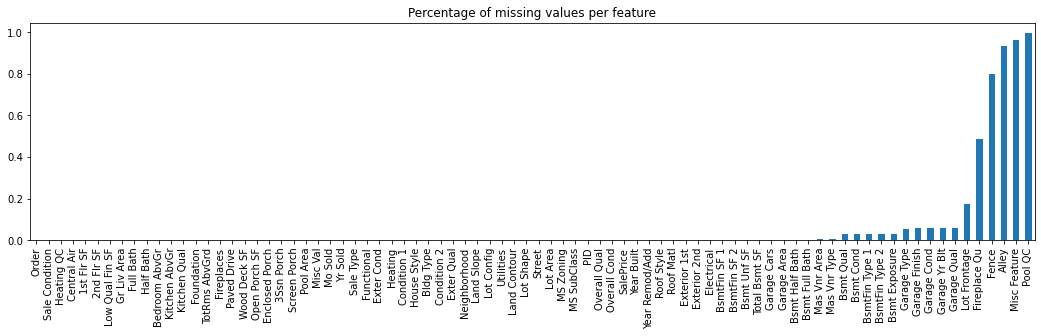

In [14]:
# identify the ratio of missing values per feature
import matplotlib.pyplot as plt

%matplotlib inline

df.isna().mean().sort_values().plot(
    kind="bar", figsize=(18, 4), title="Percentage of missing values per feature"
)
plt.show()

#### Strings

In [15]:
# show missing values of type object
df.select_dtypes(include="object").isnull().sum().sort_values(ascending=False).head(16)

Pool QC           2418
Misc Feature      2340
Alley             2267
Fence             1941
Fireplace Qu      1186
Garage Cond        138
Garage Qual        138
Garage Finish      138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
Bsmt Cond           71
BsmtFin Type 1      71
Bsmt Qual           71
Mas Vnr Type        20
Electrical           1
dtype: int64

_Consideration: In the documentation for most of the features of data type object there is a description what NAN means. Let's replace these values._

In [16]:
# replace the missing values with a string
df["Pool QC"].fillna(value="No Pool", inplace=True)
df["Misc Feature"].fillna(value="None", inplace=True)
df["Alley"].fillna(value="No Alley Access", inplace=True)
df["Fence"].fillna(value="No Fence", inplace=True)
df["Fireplace Qu"].fillna(value="No Fireplace", inplace=True)
df["Garage Cond"].fillna(value="No Garage", inplace=True)
df["Garage Qual"].fillna(value="No Garage", inplace=True)
df["Garage Finish"].fillna(value="No Garage", inplace=True)
df["Garage Type"].fillna(value="No Garage", inplace=True)
df["Bsmt Exposure"].fillna(value="No Basement", inplace=True)
df["BsmtFin Type 2"].fillna(value="No Basement", inplace=True)
df["Bsmt Qual"].fillna(value="No Basement", inplace=True)
df["BsmtFin Type 1"].fillna(value="No Basement", inplace=True)
df["Bsmt Cond"].fillna(value="No Basement", inplace=True)
df["Mas Vnr Type"].fillna(value="Unknown", inplace=True)
df["Electrical"].fillna(value="Unknown", inplace=True)

In [17]:
# same with test_df
test_df["Pool QC"].fillna(value="No Pool", inplace=True)
test_df["Misc Feature"].fillna(value="None", inplace=True)
test_df["Alley"].fillna(value="No Alley Access", inplace=True)
test_df["Fence"].fillna(value="No Fence", inplace=True)
test_df["Fireplace Qu"].fillna(value="No Fireplace", inplace=True)
test_df["Garage Cond"].fillna(value="No Garage", inplace=True)
test_df["Garage Qual"].fillna(value="No Garage", inplace=True)
test_df["Garage Finish"].fillna(value="No Garage", inplace=True)
test_df["Garage Type"].fillna(value="No Garage", inplace=True)
test_df["Bsmt Exposure"].fillna(value="No Basement", inplace=True)
test_df["BsmtFin Type 2"].fillna(value="No Basement", inplace=True)
test_df["Bsmt Qual"].fillna(value="No Basement", inplace=True)
test_df["BsmtFin Type 1"].fillna(value="No Basement", inplace=True)
test_df["Bsmt Cond"].fillna(value="No Basement", inplace=True)
test_df["Mas Vnr Type"].fillna(value="Unknown", inplace=True)
test_df["Electrical"].fillna(value="Unknown", inplace=True)

In [18]:
# Check missing values of type object
df.select_dtypes(include="object").isnull().sum().sum()

0

In [19]:
# same with test_df
test_df.select_dtypes(include="object").isnull().sum().sum()

0

#### Numbers

In [20]:
# show missing values of type float
df.select_dtypes(include="float64").isnull().sum()

Lot Frontage      420
Mas Vnr Area       20
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     138
Garage Cars         1
Garage Area         1
dtype: int64

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


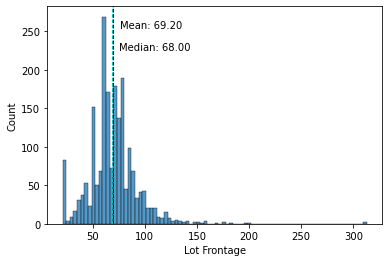

In [21]:
# create histogram for lot frontage
import seaborn as sns

sns.histplot(x=df["Lot Frontage"])

# Plot mean line
plt.axvline(df["Lot Frontage"].mean(), color="k", linestyle="dashed", linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(
    df["Lot Frontage"].mean() * 1.1,
    max_ylim * 0.9,
    "Mean: {:.2f}".format(df["Lot Frontage"].mean()),
)


# Plot median line
plt.axvline(
    df["Lot Frontage"].quantile(0.5), color="c", linestyle="dashed", linewidth=1
)
min_ylim, max_ylim = plt.ylim()
plt.text(
    df["Lot Frontage"].quantile(0.5) * 1.1,
    max_ylim * 0.8,
    "Median: {:.2f}".format(df["Lot Frontage"].quantile(0.5)),
)

plt.show()

_Observation: For the feature "Lot Frontage" the mean and median are very close. I will use the median to replace the missing values which is statistically more robust. The feature "Lot Config" gives more information about the Lot Frontage. Therefore I will use the median grouped by the "Lot Config"._

In [22]:
df.groupby("Lot Config")["Lot Frontage"].median()

Lot Config
Corner     80.5
CulDSac    50.0
FR2        63.0
FR3        76.0
Inside     66.0
Name: Lot Frontage, dtype: float64

In [23]:
# fill missing values by median of each group
df["Lot Frontage"] = df["Lot Frontage"].fillna(
    df.groupby("Lot Config")["Lot Frontage"].transform("median")
)

In [24]:
# same with test_df
test_df["Lot Frontage"] = test_df["Lot Frontage"].fillna(
    df.groupby("Lot Config")["Lot Frontage"].transform("median")
)  # fill with median values of df instead of test_df

_Observation: The feature "Mas Vnr Area" also has 20 missing values._

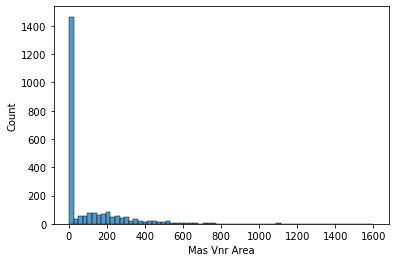

In [25]:
# create histogram
sns.histplot(x=df["Mas Vnr Area"])
plt.show()

In [26]:
# calculate the most frequent values
df["Mas Vnr Area"].mode()

0    0.0
dtype: float64

_Observation: The most common value is 0. I will use this value to replace the missing ones._

In [27]:
# Fill nan with zeros
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0.0)

In [28]:
# same with test_df
test_df["Mas Vnr Area"] = test_df["Mas Vnr Area"].fillna(0.0)

_Observation: There are still some single missing values._

In [29]:
df[
    [
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Bsmt Unf SF",
        "Total Bsmt SF",
        "Garage Area",
        "Bsmt Full Bath",
        "Bsmt Half Bath",
        "Garage Cars",
    ]
][
    df[
        [
            "BsmtFin SF 1",
            "BsmtFin SF 2",
            "Bsmt Unf SF",
            "Total Bsmt SF",
            "Garage Area",
            "Bsmt Full Bath",
            "Bsmt Half Bath",
            "Garage Cars",
        ]
    ]
    .isna()
    .any(axis=1)
]

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Garage Area,Bsmt Full Bath,Bsmt Half Bath,Garage Cars
104,NaN,NaN,NaN,NaN,280.0,NaN,NaN,1.0
1565,548.0,0.0,311.0,859.0,NaN,0.0,0.0,NaN
2056,0.0,0.0,0.0,0.0,624.0,NaN,NaN,2.0


_Consideration: Let's drop these rows, there are too many missing values.

In [30]:
# Drop single rows by index
df.drop([df.index[104], df.index[1565], df.index[2056]], axis=0, inplace=True)

In [31]:
# show missing values of type float
df.select_dtypes(include="float64").isnull().sum()

Lot Frontage        0
Mas Vnr Area        0
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
Bsmt Full Bath      0
Bsmt Half Bath      0
Garage Yr Blt     137
Garage Cars         0
Garage Area         0
dtype: int64

In [32]:
# show missing values for "Garage Yr Blt"
df.select_dtypes(include="datetime").isnull().sum()

Series([], dtype: float64)

In [33]:
# Check the missing values
df[df["Garage Yr Blt"].isna()]["Garage Finish"].unique()

array(['No Garage'], dtype=object)

_Observation: It looks like for all the houses with missing values in "Garage Yr Blt", there is no garage. Therefore set the year to 0000._

In [34]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0000)

In [35]:
# same with test_df
test_df["Garage Yr Blt"] = test_df["Garage Yr Blt"].fillna(0000)

In [36]:
# show head of features type float
df.select_dtypes(include="float64").head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,66.0,0.0,300.0,0.0,652.0,952.0,0.0,0.0,2000.0,2.0,554.0
1,75.0,522.0,0.0,0.0,216.0,216.0,0.0,0.0,1951.0,2.0,400.0
2,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,1970.0,1.0,286.0
3,70.0,0.0,1018.0,0.0,380.0,1398.0,0.0,1.0,1959.0,2.0,447.0
4,60.0,0.0,0.0,0.0,925.0,925.0,0.0,0.0,1960.0,1.0,308.0


In [37]:
# Check if a float value is a whole number
def is_whole(n):
    return n % 1 == 0


is_whole(df.select_dtypes(include="float64")).sum()

Lot Frontage      2341
Mas Vnr Area      2427
BsmtFin SF 1      2427
BsmtFin SF 2      2427
Bsmt Unf SF       2427
Total Bsmt SF     2427
Bsmt Full Bath    2427
Bsmt Half Bath    2427
Garage Yr Blt     2427
Garage Cars       2427
Garage Area       2427
dtype: int64

_Observation: Allmost all the values are indeed whole numbers. Therefore I will store them as integers._

In [38]:
# Convert to integer
df[
    [
        "Lot Frontage",
        "Mas Vnr Area",
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Bsmt Unf SF",
        "Total Bsmt SF",
        "Bsmt Full Bath",
        "Bsmt Half Bath",
        "Garage Cars",
        "Garage Area",
        "Garage Yr Blt",
    ]
] = df[
    [
        "Lot Frontage",
        "Mas Vnr Area",
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Bsmt Unf SF",
        "Total Bsmt SF",
        "Bsmt Full Bath",
        "Bsmt Half Bath",
        "Garage Cars",
        "Garage Area",
        "Garage Yr Blt",
    ]
].astype(
    int
)

In [39]:
# same with test_df
test_df[
    [
        "Lot Frontage",
        "Mas Vnr Area",
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Bsmt Unf SF",
        "Total Bsmt SF",
        "Bsmt Full Bath",
        "Bsmt Half Bath",
        "Garage Cars",
        "Garage Area",
        "Garage Yr Blt",
    ]
] = test_df[
    [
        "Lot Frontage",
        "Mas Vnr Area",
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Bsmt Unf SF",
        "Total Bsmt SF",
        "Bsmt Full Bath",
        "Bsmt Half Bath",
        "Garage Cars",
        "Garage Area",
        "Garage Yr Blt",
    ]
].astype(
    int
)

In [40]:
# Check the missing values
df.isnull().sum().sum()

0

In [41]:
# same with test_df
test_df.isnull().sum().sum()

0

In [42]:
# Current count of data types
pd.value_counts(df.dtypes)

object    48
int64     34
dtype: int64

In [43]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2427, 82)
Shape of test_df: (500, 81)


### Outliers

#### Feature distribution

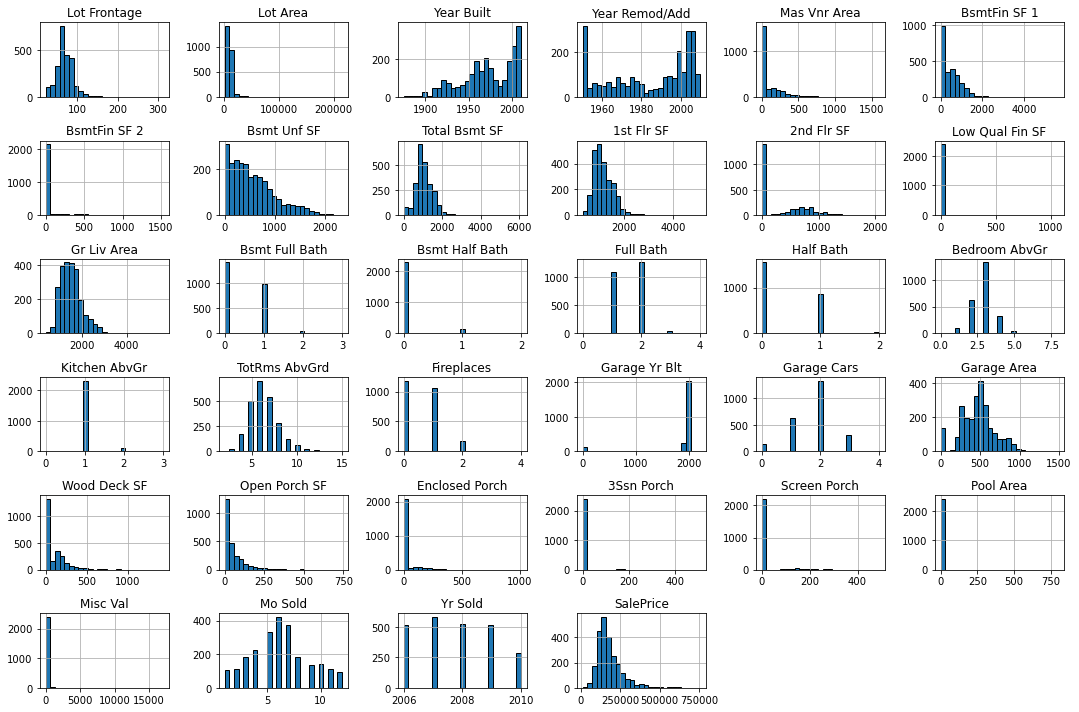

In [44]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 10), layout=(-1, 6), edgecolor="black")
plt.tight_layout()
plt.show()

_Observation: Many features contain mostly entries of just one category. I will remove any feature where the most frequent element occurs more than 90% of the time, as the feature does not add valuable additional information to the dataset._ 

In [45]:
# compute for each feature the ratio with which the most frequent entry occurs

# Collects for each feature the most frequent entry
most_frequent_entry = df.loc[:, ~df.columns.isin(["PID", "Order"])].mode(
    dropna=False
)  # exclude PID & Order

# Checks for each entry if it contains the most frequent entry
df_freq = df.loc[:, ~df.columns.isin(["PID", "Order"])].eq(
    most_frequent_entry.values, axis=1
)  # exclude PID & Order

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
df_freq.head()

Utilities      0.998764
Street         0.995468
Pool Area      0.995056
Pool QC        0.995056
Condition 2    0.988875
dtype: float64

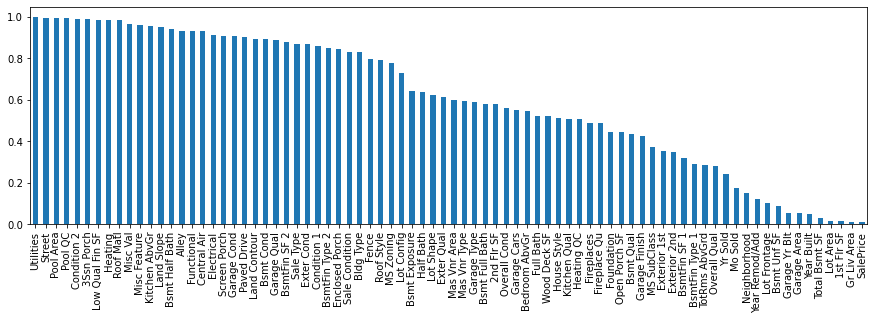

In [46]:
df_freq.plot.bar(figsize=(15, 4))
plt.show()

In [47]:
# Shape of feature matrix before cleaning
print("Shape before cleaning:", df.shape)

# Loop through the indices where 'most_frequent_ratio' is great than 99%
for col in df_freq[df_freq > 0.90].index:

    #  Remove feature
    df = df.drop(columns=col)

# Shape of feature matrix after cleaning
print("Shape after cleaning:", df.shape)

Shape before cleaning: (2427, 82)
Shape after cleaning: (2427, 61)


In [48]:
# Current shape
print("Shape of test_df:", test_df.shape)

Shape of test_df: (500, 81)


In [49]:
# same with test_df
# delete the same columns
test_df.drop(
    columns=[
        "Utilities",
        "Street",
        "Pool Area",
        "Pool QC",
        "Condition 2",
        "3Ssn Porch",
        "Low Qual Fin SF",
        "Heating",
        "Roof Matl",
        "Misc Val",
        "Misc Feature",
        "Kitchen AbvGr",
        "Land Slope",
        "Bsmt Half Bath",
        "Alley",
        "Functional",
        "Central Air",
        "Electrical",
        "Screen Porch",
        "Garage Cond",
        "Paved Drive",
    ],
    axis=1,
    inplace=True,
)

In [50]:
# Current shape
print("Shape of test_df:", test_df.shape)

Shape of test_df: (500, 60)


#### Numeric Data: z-scores

_I will us the rule 5-times greater than the standard deviation from the mean to detect outliers and deleting them (only for df, not test_df). If a z-score returned is larger than 5 that the value is quite unusual. Because z-scores expect variables with quasi-normal distributions, I will transform the skewed variables by log-transforming them before using z-scores for outlier detection. To avoid zeros returning "inf", I will add a constant value of +1 to the data._

In [51]:
# Checking the distribution with Skewness
df.select_dtypes(include="number").skew()

Lot Frontage       1.826368
Lot Area          12.933804
Year Built        -0.598833
Year Remod/Add    -0.448607
Mas Vnr Area       2.574298
BsmtFin SF 1       1.507715
BsmtFin SF 2       4.033647
Bsmt Unf SF        0.926718
Total Bsmt SF      1.243080
1st Flr SF         1.453107
2nd Flr SF         0.853888
Gr Liv Area        1.249450
Bsmt Full Bath     0.633887
Full Bath          0.128708
Half Bath          0.755813
Bedroom AbvGr      0.215603
TotRms AbvGrd      0.743577
Fireplaces         0.753866
Garage Yr Blt     -3.827138
Garage Cars       -0.278179
Garage Area        0.231307
Wood Deck SF       1.911588
Open Porch SF      2.645800
Enclosed Porch     4.201871
Mo Sold            0.193503
Yr Sold            0.151757
SalePrice          1.792553
dtype: float64

- The variables with skewness > 1  are highly positively skewed.
- The variables with skewness < -1 are highly negatively skewed.
- The variables with 0.5 < skewness < 1 are positively skewed.
- The variables with -0.5 < skewness < -1  are moderately negatively skewed.
- And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed

In [52]:
# show original data of type number
df.select_dtypes(include="number").head(3)

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,SalePrice
0,66,8795,2000,2000,0,300,0,652,952,980,...,1,2000,2,554,224,54,0,4,2009,236000
1,75,10170,1951,1951,522,0,0,216,216,1575,...,1,1951,2,400,0,0,0,6,2006,155000
2,21,2001,1970,1970,80,0,0,546,546,546,...,0,1970,1,286,0,0,0,1,2007,75000


In [53]:
# performing logarithmic transformation on the features by applying log(x+1) element-wise
import numpy as np

df_numeric_log = df.select_dtypes(include="number").applymap(
    lambda x: np.log(x + 1)
)  # constant +1 to avoid "inf" returned
df_numeric_log.head(3)

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,SalePrice
0,4.204693,9.082052,7.601402,7.601402,0.000000,5.70711,0.0,6.481577,6.859615,6.888572,...,0.693147,7.601402,1.098612,6.318968,5.4161,4.007333,0.0,1.609438,7.605890,12.371591
1,4.330733,9.227296,7.576610,7.576610,6.259581,0.00000,0.0,5.379897,5.379897,7.362645,...,0.693147,7.576610,1.098612,5.993961,0.0000,0.000000,0.0,1.945910,7.604396,11.951187
2,3.091042,7.601902,7.586296,7.586296,4.394449,0.00000,0.0,6.304449,6.304449,6.304449,...,0.000000,7.586296,0.693147,5.659482,0.0000,0.000000,0.0,0.693147,7.604894,11.225257


In [54]:
# calculate z-scores of all numeric log-transformed features in the df
import scipy.stats as stats

z_scores = df_numeric_log.apply(stats.zscore)
z_scores.head(3)

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,SalePrice
0,0.033536,-0.030595,0.949817,0.760039,-0.799992,0.494154,-0.366373,0.464726,0.112662,-0.358426,...,0.773565,0.250978,0.395726,0.353769,1.146571,0.779575,-0.422718,-0.643818,0.926970,0.867263
1,0.422729,0.253464,-0.661543,-1.606893,1.586502,-1.418571,-0.366373,-0.116621,-1.112111,1.113723,...,0.773565,0.236825,0.395726,0.131341,-0.942116,-1.084886,-0.422718,0.124998,-1.359577,-0.163492
2,-3.405240,-2.925395,-0.031979,-0.682125,0.875412,-1.418571,-0.366373,0.371257,-0.346853,-2.172319,...,-0.983427,0.242355,-0.851153,-0.097569,-0.942116,-1.084886,-0.422718,-2.737478,-0.597015,-1.943341


In [55]:
# filter with z_scores larger than 5 to remove outliers

abs_z_scores = np.abs(z_scores)  # convert each element to its absolute value
filtered_entries = (abs_z_scores < 5).all(
    axis=1
)  # create a boolean array with TRUE for values less than 5 standard deviations from the mean
df = df[filtered_entries]  # Filter the original DataFrame with this result

In [56]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 61)
Shape of test_df: (500, 60)


In [57]:
# same for test_df

### Rare values

_Consideration: I will define rare values for nominal data as category that appear less 0.5% of the time. I will map these rare values to “Other”. I want to do this with all my categorical data of type nominal. Ordinal features would get distort, therefore I leave them out._

In [58]:
df_nominal = df[
    [
        "MS SubClass",
        "MS Zoning",
        "Land Contour",
        "Lot Config",
        "Neighborhood",
        "Condition 1",
        "Bldg Type",
        "House Style",
        "Garage Type",
        "Roof Style",
        "Exterior 1st",
        "Mas Vnr Type",
        "Foundation",
        "Sale Type",
        "Sale Condition",
        "Exterior 2nd",
    ]
]

In [59]:
# show frequency of a selected feature before
df["Exterior 2nd"].value_counts(ascending=True, normalize=True)

CBlock     0.000426
PreCast    0.000426
Stone      0.001279
AsphShn    0.001279
ImStucc    0.005115
Brk Cmn    0.008099
AsbShng    0.012788
Stucco     0.015345
BrkFace    0.017050
Wd Shng    0.026428
CmentBd    0.039642
Plywood    0.090793
Wd Sdng    0.132566
HdBoard    0.140665
MetalSd    0.150895
VinylSd    0.357204
Name: Exterior 2nd, dtype: float64

In [60]:
# set category to "other" if frequency is lower than 0,5%
cat_vars_new = df_nominal.apply(
    lambda x: x.mask(x.map(x.value_counts(normalize=True)) < 0.005, "other"), axis=0
)

In [61]:
# show frequency of a selected feature after
cat_vars_new["Exterior 2nd"].value_counts(ascending=True, normalize=True)

other      0.003410
ImStucc    0.005115
Brk Cmn    0.008099
AsbShng    0.012788
Stucco     0.015345
BrkFace    0.017050
Wd Shng    0.026428
CmentBd    0.039642
Plywood    0.090793
Wd Sdng    0.132566
HdBoard    0.140665
MetalSd    0.150895
VinylSd    0.357204
Name: Exterior 2nd, dtype: float64

In [62]:
# reflect the changes in the original data frame

# show number of unique values before the chance
print(
    "number of unique values before the change:", df_nominal["Exterior 2nd"].nunique()
)

# drop old nominal columns
df.drop(df_nominal, axis=1, inplace=True)

# add new categorical columns to old dataframe
df = df.join(cat_vars_new)

# show number of unique values after the chance
print("number of unique values after the change:", df["Exterior 2nd"].nunique())

number of unique values before the change: 16
number of unique values after the change: 13


#### Same with test_df

In [63]:
# Check original entry
test_df["Exterior 2nd"].unique()

array(['MetalSd', 'VinylSd', 'Wd Sdng', 'AsbShng', 'Plywood', 'CmentBd',
       'Wd Shng', 'HdBoard', 'Stucco', 'BrkFace', 'Brk Cmn', 'Stone',
       'ImStucc', 'Other', 'CBlock'], dtype=object)

In [64]:
# change entry in test_df to other if there is no match to cat_vars_new
test_df["Exterior 2nd"] = test_df["Exterior 2nd"].where(
    test_df["Exterior 2nd"].isin(cat_vars_new["Exterior 2nd"]), "other"
)

In [65]:
# Compare to new entry
test_df["Exterior 2nd"].unique()

array(['MetalSd', 'VinylSd', 'Wd Sdng', 'AsbShng', 'Plywood', 'CmentBd',
       'Wd Shng', 'HdBoard', 'Stucco', 'BrkFace', 'Brk Cmn', 'other',
       'ImStucc'], dtype=object)

_Observation: "Stone" and "CBlock" are now "other", which is correct._

In [66]:
test_df["MS SubClass"] = test_df["MS SubClass"].where(
    test_df["MS SubClass"].isin(cat_vars_new["MS SubClass"]), "other"
)

In [67]:
test_df["MS Zoning"] = test_df["MS Zoning"].where(
    test_df["MS Zoning"].isin(cat_vars_new["MS Zoning"]), "other"
)

In [68]:
test_df["Land Contour"] = test_df["Land Contour"].where(
    test_df["Land Contour"].isin(cat_vars_new["Land Contour"]), "other"
)

In [69]:
test_df["Lot Config"] = test_df["Lot Config"].where(
    test_df["Lot Config"].isin(cat_vars_new["Lot Config"]), "other"
)

In [70]:
test_df["Neighborhood"] = test_df["Neighborhood"].where(
    test_df["Neighborhood"].isin(cat_vars_new["Neighborhood"]), "other"
)

In [71]:
test_df["Condition 1"] = test_df["Condition 1"].where(
    test_df["Condition 1"].isin(cat_vars_new["Condition 1"]), "other"
)

In [72]:
test_df["Bldg Type"] = test_df["Bldg Type"].where(
    test_df["Bldg Type"].isin(cat_vars_new["Bldg Type"]), "other"
)

In [73]:
test_df["House Style"] = test_df["House Style"].where(
    test_df["House Style"].isin(cat_vars_new["House Style"]), "other"
)

In [74]:
test_df["Garage Type"] = test_df["Garage Type"].where(
    test_df["Garage Type"].isin(cat_vars_new["Garage Type"]), "other"
)

In [75]:
test_df["Roof Style"] = test_df["Roof Style"].where(
    test_df["Roof Style"].isin(cat_vars_new["Roof Style"]), "other"
)

In [76]:
test_df["Exterior 1st"] = test_df["Exterior 1st"].where(
    test_df["Exterior 1st"].isin(cat_vars_new["Exterior 1st"]), "other"
)

In [77]:
test_df["Mas Vnr Type"] = test_df["Mas Vnr Type"].where(
    test_df["Mas Vnr Type"].isin(cat_vars_new["Mas Vnr Type"]), "other"
)

In [78]:
test_df["Foundation"] = test_df["Foundation"].where(
    test_df["Foundation"].isin(cat_vars_new["Foundation"]), "other"
)

In [79]:
test_df["Sale Type"] = test_df["Sale Type"].where(
    test_df["Sale Type"].isin(cat_vars_new["Sale Type"]), "other"
)

In [80]:
test_df["Sale Condition"] = test_df["Sale Condition"].where(
    test_df["Sale Condition"].isin(cat_vars_new["Sale Condition"]), "other"
)

In [81]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 61)
Shape of test_df: (500, 60)


## Feature encoding
---

### Ordinal encoding 

_Many ordinal features have a scale like this:_

* Ex   Excellent
* Gd   Good
* TA   Average/Typical
* Fa   Fair
* Po   Poor

_Some have the additional category NA (ex. No Fireplace). I will encode these as integers from 0 to 5 in increasing quality or condition._

In [82]:
qual_map = {
    "No Fireplace": 0,
    "No Garage": 0,
    "No Basement": 0,
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5,
}
qual_vars = [
    "Exter Qual",
    "Exter Cond",
    "Bsmt Qual",
    "Bsmt Cond",
    "Heating QC",
    "Kitchen Qual",
    "Fireplace Qu",
    "Garage Qual",
]


for col in qual_vars:
    df[col] = df[col].map(qual_map)

In [83]:
# same for test_df
for col in qual_vars:
    test_df[col] = test_df[col].map(qual_map)

In [84]:
# Check the data:
df[qual_vars]

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual
0,4,3,4,3,5,4,3,3
1,3,3,3,3,3,4,4,3
2,3,3,3,3,2,3,0,3
3,3,3,3,3,4,4,4,3
4,2,3,3,3,3,3,4,3
...,...,...,...,...,...,...,...,...
2425,3,4,4,4,3,3,0,0
2426,3,4,4,3,4,4,0,3
2427,3,3,3,3,3,3,3,3
2428,3,3,3,3,3,3,4,3


_Observation: Some feature have a different scale. I will manually encode them._

In [85]:
# Maps for ordinal features

Fence_map = {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "NA": 0, "No Fence": 0}
df["Fence"] = df["Fence"].map(Fence_map)
test_df["Fence"] = test_df["Fence"].map(Fence_map)  # same for test_df

BsmtExposure_map = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0, "No Basement": 0}
df["Bsmt Exposure"] = df["Bsmt Exposure"].map(BsmtExposure_map)
test_df["Bsmt Exposure"] = test_df["Bsmt Exposure"].map(
    BsmtExposure_map
)  # same for test_df

BsmtFinType_map = {
    "No Basement": 0,
    "NA": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ": 6,
}
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].map(BsmtFinType_map)
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].map(BsmtFinType_map)
test_df["BsmtFin Type 1"] = test_df["BsmtFin Type 1"].map(
    BsmtFinType_map
)  # same for test_df
test_df["BsmtFin Type 2"] = test_df["BsmtFin Type 2"].map(
    BsmtFinType_map
)  # same for test_df

GarageFinish_map = {"No Garage": 0, "NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}
df["Garage Finish"] = df["Garage Finish"].map(GarageFinish_map)
test_df["Garage Finish"] = test_df["Garage Finish"].map(
    GarageFinish_map
)  # same for test_df

LotShape_map = {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}
df["Lot Shape"] = df["Lot Shape"].map(LotShape_map)
test_df["Lot Shape"] = test_df["Lot Shape"].map(LotShape_map)  # same for test_df

In [86]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

int64     41
object    20
dtype: int64

In [87]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 61)
Shape of test_df: (500, 60)


### One-hot encoding

In [88]:
df_nominal = df[
    [
        "MS SubClass",
        "MS Zoning",
        "Land Contour",
        "Lot Config",
        "Neighborhood",
        "Condition 1",
        "Bldg Type",
        "House Style",
        "Garage Type",
        "Roof Style",
        "Exterior 1st",
        "Mas Vnr Type",
        "Foundation",
        "Sale Type",
        "Sale Condition",
        "Exterior 2nd",
    ]
]

In [89]:
# Establish number of columns and rows needed to plot all features
n_cols = 4
n_elements = len(df_nominal.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
print(n_cols, n_rows)

4 4


In [90]:
# Specify y_value
y_value = df["SalePrice"]

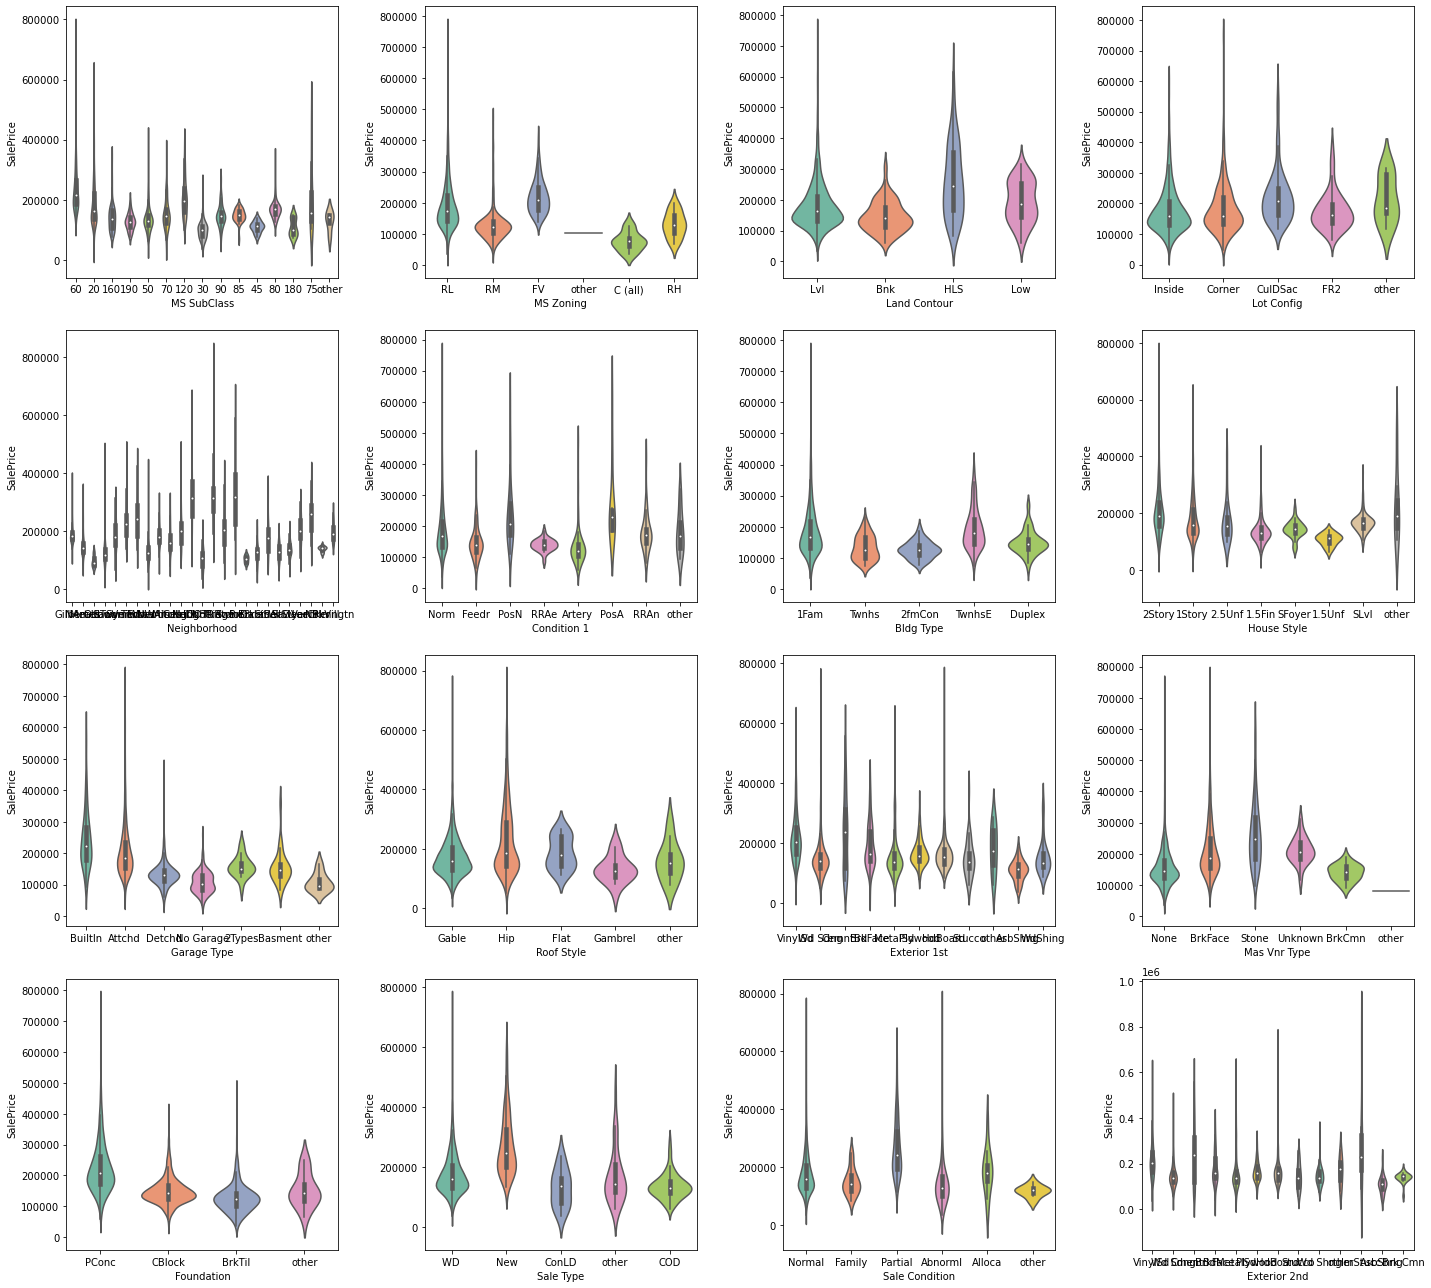

In [91]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, n_rows * 4.5))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(df_nominal, axes.ravel()):
    sns.violinplot(
        data=df_nominal,
        x=col,
        y=y_value,
        ax=ax,
        palette="Set2",
        split=True,
    )

plt.tight_layout()

_Consideration: I will use one-hot encoding for all my nominal features._

In [92]:
df = pd.get_dummies(
    df,
    columns=[
        "MS SubClass",
        "MS Zoning",
        "Land Contour",
        "Lot Config",
        "Neighborhood",
        "Condition 1",
        "Bldg Type",
        "House Style",
        "Garage Type",
        "Roof Style",
        "Exterior 1st",
        "Mas Vnr Type",
        "Foundation",
        "Sale Type",
        "Sale Condition",
        "Exterior 2nd",
    ],
)

In [93]:
# same for test_df
test_df = pd.get_dummies(
    test_df,
    columns=[
        "MS SubClass",
        "MS Zoning",
        "Land Contour",
        "Lot Config",
        "Neighborhood",
        "Condition 1",
        "Bldg Type",
        "House Style",
        "Garage Type",
        "Roof Style",
        "Exterior 1st",
        "Mas Vnr Type",
        "Foundation",
        "Sale Type",
        "Sale Condition",
        "Exterior 2nd",
    ],
)

In [94]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 178)
Shape of test_df: (500, 174)


In [95]:
# Let's check if the column headings are the same in both data set, df and test_df
dif_1 = [x for x in df.columns if x not in test_df.columns]
print(f"Features present in df and absent in test_df: {dif_1}")

dif_2 = [x for x in test_df.columns if x not in df.columns]
print(f"Features present in test_df set and absent in df: {dif_2}")

Features present in df and absent in test_df: ['SalePrice', 'MS Zoning_other', 'Exterior 1st_other', 'Mas Vnr Type_other']
Features present in test_df set and absent in df: []


_Consideration: 3 of the features are absent from the test set. Thus, I will drop these features from df in order to have the same columns in both data sets._

In [96]:
# Let's drop these columns from df_train_binary
df.drop(
    ["MS Zoning_other", "Exterior 1st_other", "Mas Vnr Type_other"],
    axis=1,
    inplace=True,
)

In [97]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 175)
Shape of test_df: (500, 174)


## Feature engineering
---

_Consideration: I will create some new features which add value to the data and simpifly it._

In [98]:
# convert to number
df[["Overall Cond", "Overall Qual"]] = df[["Overall Cond", "Overall Qual"]].astype(int)
test_df[["Overall Cond", "Overall Qual"]] = test_df[
    ["Overall Cond", "Overall Qual"]
].astype(
    int
)  # same for test_df

In [99]:
# Create new features

df["Total_Area"] = df["Total Bsmt SF"] + df["Gr Liv Area"]
test_df["Total_Area"] = (
    test_df["Total Bsmt SF"] + test_df["Gr Liv Area"]
)  # same for test_df

df["Total_Bathrooms"] = df["Full Bath"] + (0.5 * df["Half Bath"]) + df["Bsmt Full Bath"]
test_df["Total_Bathrooms"] = (
    test_df["Full Bath"] + (0.5 * test_df["Half Bath"]) + test_df["Bsmt Full Bath"]
)  # same for test_df

df["Porch_Area"] = df["Open Porch SF"] + df["Enclosed Porch"] + df["Wood Deck SF"]
test_df["Porch_Area"] = (
    test_df["Open Porch SF"] + test_df["Enclosed Porch"] + test_df["Wood Deck SF"]
)  # same for test_df

df["Has_Porch"] = df["Porch_Area"].apply(lambda x: 1 if x > 0 else 0)
test_df["Has_Porch"] = test_df["Porch_Area"].apply(
    lambda x: 1 if x > 0 else 0
)  # same for test_df


df["Is_New"] = df["Year Built"].apply(lambda x: 1 if x > 2000 else 0)
test_df["Is_New"] = test_df["Year Built"].apply(
    lambda x: 1 if x > 2000 else 0
)  # same for test_df

df["Is_Old"] = df["Year Built"].apply(lambda x: 1 if x < 1960 else 0)
test_df["Is_Old"] = test_df["Year Built"].apply(
    lambda x: 1 if x < 1960 else 0
)  # same for test_df

_Consideration: I will drop the input features used for the new combinations of features, as they  don’t add “modeling power” and can lead to ill-conditioning and numerical issues._

In [100]:
df.drop(
    [
        "Total Bsmt SF",
        "Gr Liv Area",
        "Full Bath",
        "Half Bath",
        "Bsmt Full Bath",
        "Open Porch SF",
        "Enclosed Porch",
        "Wood Deck SF",
        "Year Built",
    ],
    axis=1,
    inplace=True,
)

# same for test_df
test_df.drop(
    [
        "Total Bsmt SF",
        "Gr Liv Area",
        "Full Bath",
        "Half Bath",
        "Bsmt Full Bath",
        "Open Porch SF",
        "Enclosed Porch",
        "Wood Deck SF",
        "Year Built",
    ],
    axis=1,
    inplace=True,
)

In [101]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

uint8      130
int64       39
object       2
float64      1
dtype: int64

In [102]:
df.select_dtypes(include="float").head(3)

,Total_Bathrooms
0,2.5
1,1.5
2,1.5


In [103]:
# Current shape
print("Shape of df:", df.shape)
print("Shape of test_df:", test_df.shape)

Shape of df: (2346, 172)
Shape of test_df: (500, 171)


### Log-transformation

_For right-skewed features I use log-transformation._

In [104]:
df_continous = [
    "Total_Area",
    "Mas Vnr Area",
    "Lot Area",
    "Lot Frontage",
    "1st Flr SF",
    "2nd Flr SF",
    "Bsmt Unf SF",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Garage Area",
    "Porch_Area",
    "SalePrice",
]

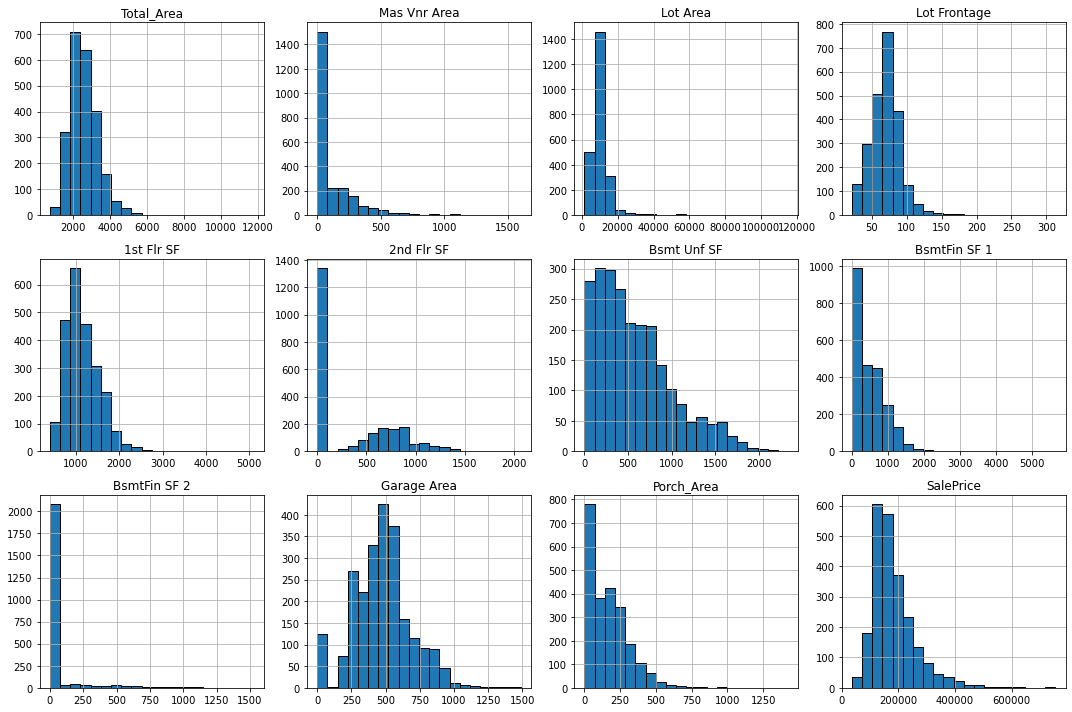

In [105]:
# Plot the distribution of the continous numeric variables using histograms

df[df_continous].hist(
    bins=20,
    figsize=(15, 10),
    layout=(-1, 4),
    edgecolor="black",
)
plt.tight_layout()
plt.show()

_Observation: The data is skewed, I decide to log-transorm the features to get a normal distribution._

In [106]:
df[df_continous]

,Total_Area,Mas Vnr Area,Lot Area,Lot Frontage,1st Flr SF,2nd Flr SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Garage Area,Porch_Area,SalePrice
0,3208,0,8795,66,980,1276,652,300,0,554,278,236000
1,1791,522,10170,75,1575,0,216,0,0,400,0,155000
2,1638,80,2001,21,546,546,546,0,0,286,0,75000
3,3098,0,10552,70,1700,0,380,1018,0,447,38,165500
4,2814,0,10120,60,964,925,925,0,0,308,264,122000
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2400,0,10800,60,1200,0,0,1200,0,0,120,179000
2426,2080,0,12464,82,1040,0,308,732,0,576,168,152000
2427,2264,96,11584,80,1040,685,114,315,110,550,304,197000
2428,2110,1047,13400,85,1086,0,380,516,128,484,0,159950


In [107]:
# performing logarithmic transformation by applying log(x+1) element-wise to a subset of columns
df[df_continous] = df[df_continous].applymap(lambda x: np.log(x + 1))

In [108]:
# same with test_df
test_df_continous = [
    "Total_Area",
    "Mas Vnr Area",
    "Lot Area",
    "Lot Frontage",
    "1st Flr SF",
    "2nd Flr SF",
    "Bsmt Unf SF",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Garage Area",
    "Porch_Area",
]
test_df[test_df_continous] = test_df[test_df_continous].applymap(
    lambda x: np.log(x + 1)
)

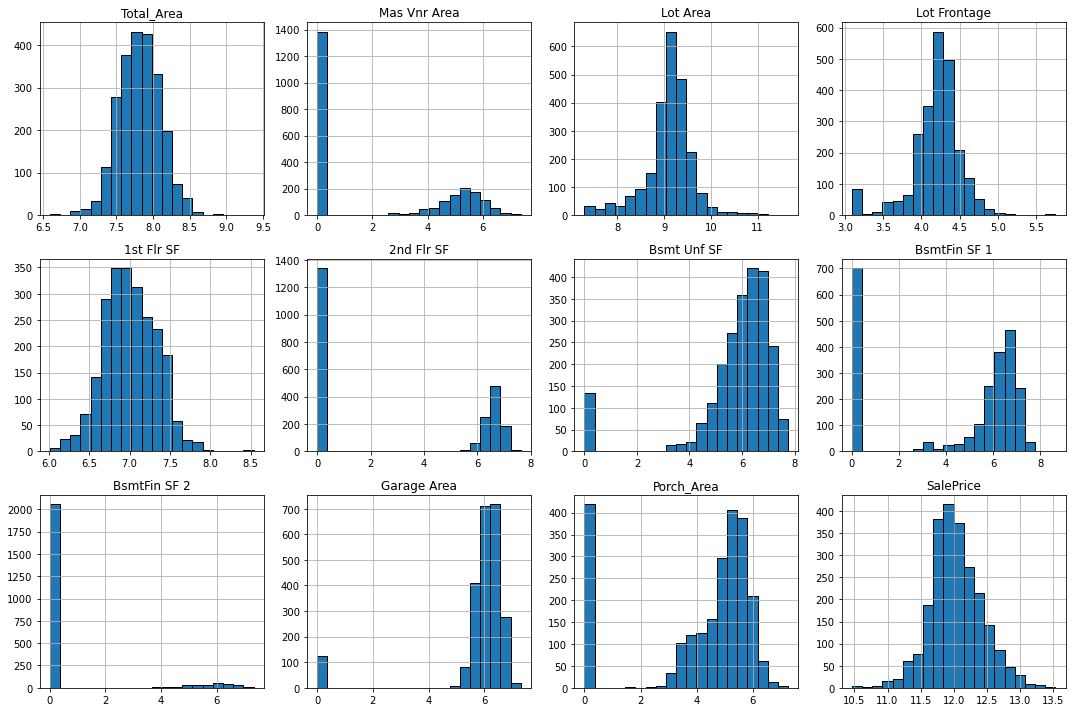

In [109]:
# Plot the distribution of the continous numeric variables using histograms

df[df_continous].hist(
    bins=20,
    figsize=(15, 10),
    layout=(-1, 4),
    edgecolor="black",
)
plt.tight_layout()
plt.show()

## Correlation and visualization

### Non-continuous features

In [110]:
pd.value_counts(df.dtypes)

uint8      130
int64       27
float64     13
object       2
dtype: int64

In [111]:
# show missing values of type float
df.select_dtypes(include="uint8").head(5)

,MS SubClass_20,MS SubClass_30,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,...,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exterior 2nd_other
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# all non-continuous features
df_ncont = df[
    [
        "Year Remod/Add",
        "Bedroom AbvGr",
        "TotRms AbvGrd",
        "Fireplaces",
        "Garage Yr Blt",
        "Garage Cars",
        "Mo Sold",
        "Yr Sold",
        "Has_Porch",
        "Is_New",
        "Is_Old",
    ]
]
df_ncont.head(5)

,Year Remod/Add,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold,Has_Porch,Is_New,Is_Old
0,2000,4,8,1,2000,2,4,2009,1,0,0
1,1951,2,5,1,1951,2,6,2006,0,0,1
2,1970,3,6,0,1970,1,1,2007,0,0,0
3,1959,4,6,1,1959,2,4,2010,1,0,1
4,1950,4,9,1,1960,1,1,2007,1,0,1


In [113]:
# Establish number of columns and rows needed to plot all features
n_cols = 3
n_elements = len(df_ncont.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
print(n_cols, n_rows)

3 4


In [114]:
# Specify y_value
y_value = df["SalePrice"]

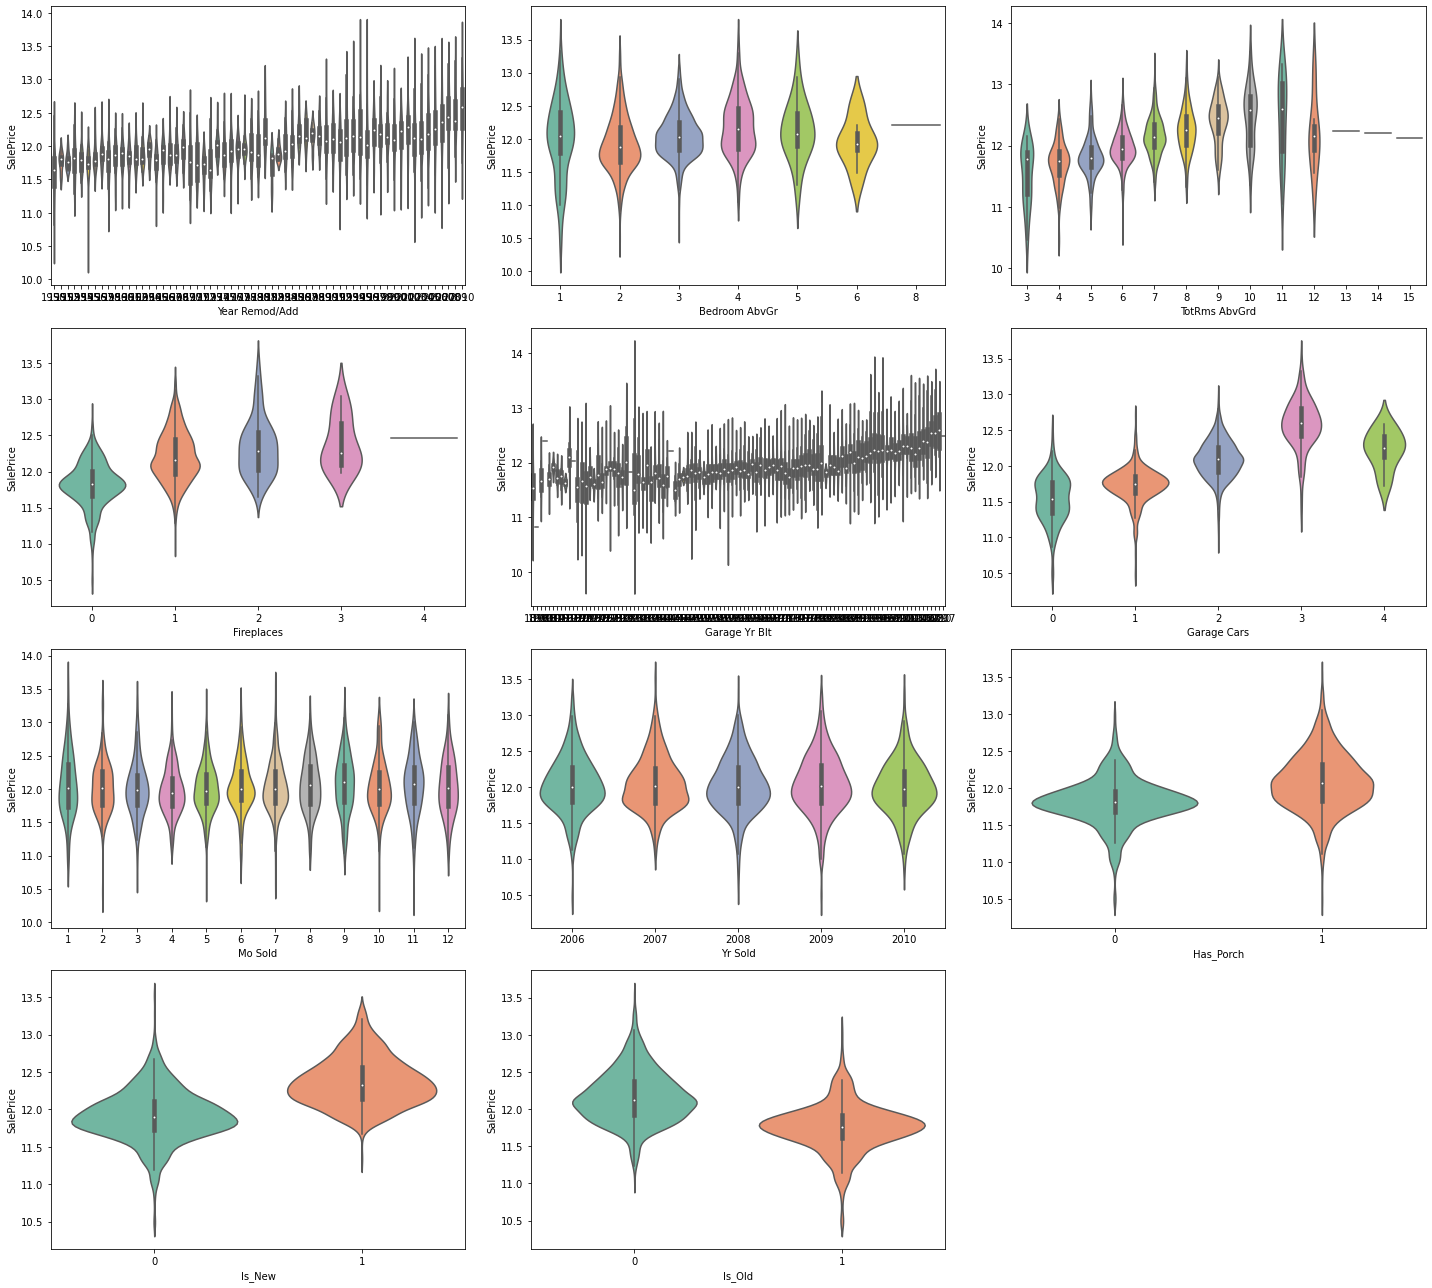

In [115]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, n_rows * 4.5))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(df_ncont, axes.ravel()):
    sns.violinplot(
        data=df_ncont,
        x=col,
        y=y_value,
        ax=ax,
        palette="Set2",
        split=True,
    )

fig.delaxes(axes[3][2])

plt.tight_layout()

### Numeric and ordinal features
---

In [116]:
# all ordinal features + 'SalePrice'
df_ordinal = df[
    [
        "Overall Cond",
        "Overall Qual",
        "Exter Qual",
        "Exter Cond",
        "Bsmt Qual",
        "Bsmt Cond",
        "Kitchen Qual",
        "Fireplace Qu",
        "Garage Qual",
        "Garage Finish",
        "Heating QC",
        "Fence",
        "BsmtFin Type 1",
        "BsmtFin Type 2",
        "Bsmt Exposure",
        "Lot Shape",
        "SalePrice",
    ]
]

In [117]:
# all numeric features incl. 'SalePrice'
df_numeric = df[
    [
        "Total_Area",
        "Mas Vnr Area",
        "Lot Area",
        "Lot Frontage",
        "1st Flr SF",
        "2nd Flr SF",
        "Bsmt Unf SF",
        "BsmtFin SF 1",
        "BsmtFin SF 2",
        "Garage Area",
        "Garage Cars",
        "Garage Yr Blt",
        "TotRms AbvGrd",
        "Total_Bathrooms",
        "Bedroom AbvGr",
        "Year Remod/Add",
        "Mo Sold",
        "Yr Sold",
        "Is_New",
        "Is_Old",
        "Fireplaces",
        "Porch_Area",
        "Has_Porch",
        "SalePrice",
    ]
]

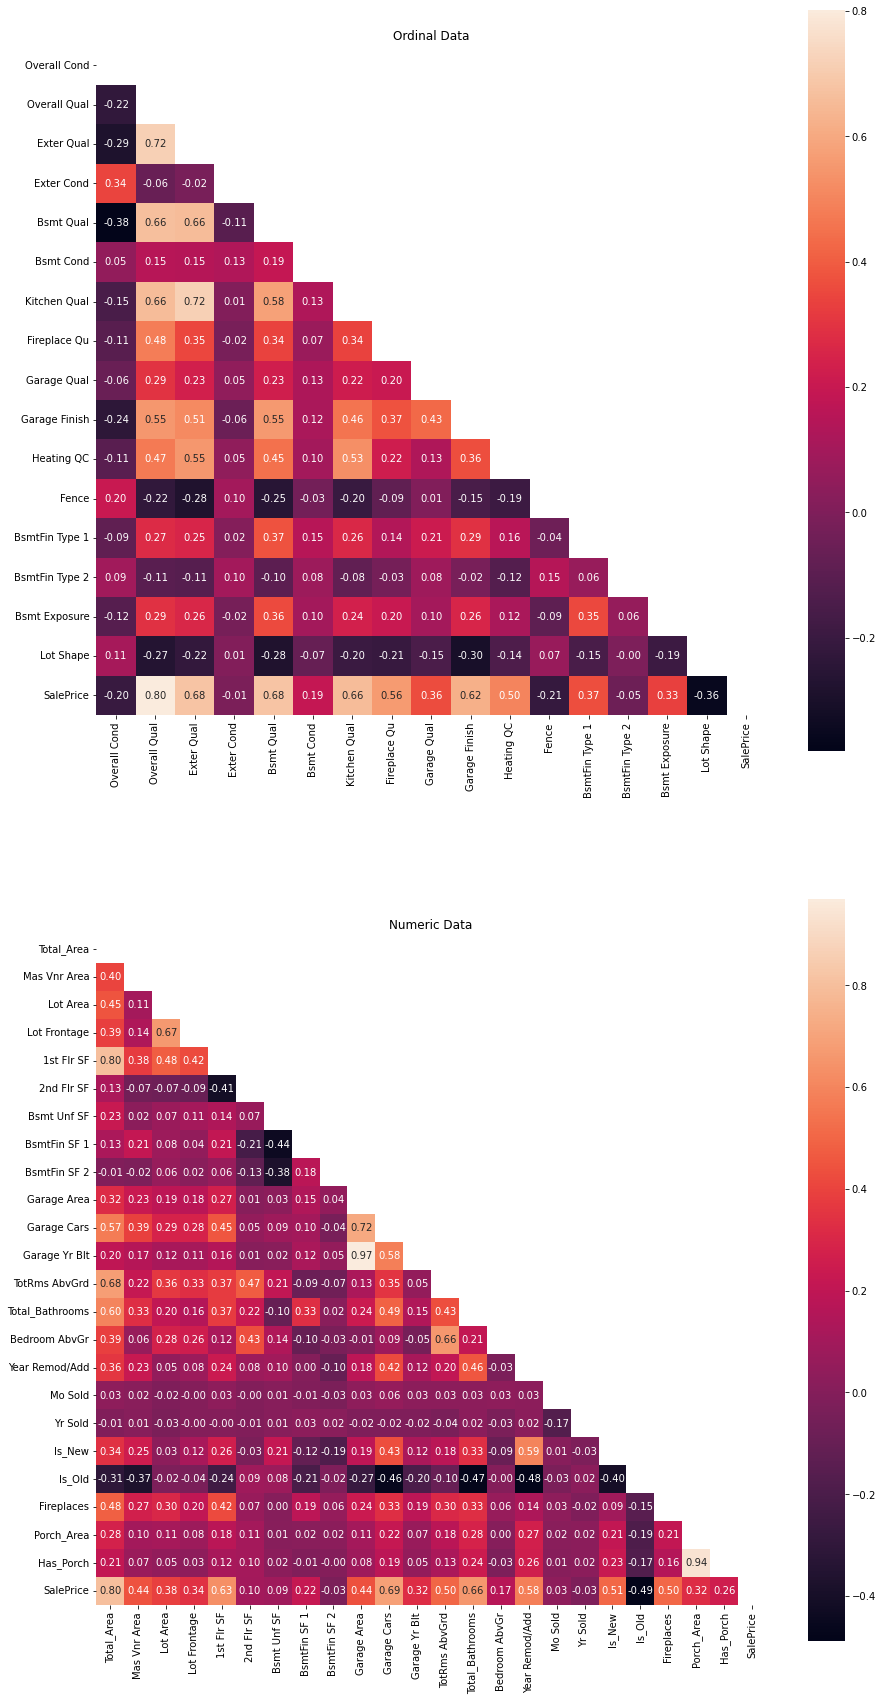

In [118]:
fig, axes = plt.subplots(2, 1, figsize=(15, 30))

df_ordinal_corr = df_ordinal.corr(method="spearman")
df_numeric_corr = df_numeric.corr(method="pearson")

# Plot correlation matrix

# Mask the upper part of the heatmap
mask_ordinal = np.triu(np.ones_like(df_ordinal_corr, dtype=bool))
mask_numeric = np.triu(np.ones_like(df_numeric_corr, dtype=bool))

# Plot ordinal data
sns.heatmap(
    df_ordinal_corr, annot=True, ax=axes[0], fmt="0.2f", square=True, mask=mask_ordinal
).set_title("Ordinal Data")

# Plot numeric data
sns.heatmap(
    df_numeric_corr, annot=True, ax=axes[1], fmt="0.2f", square=True, mask=mask_numeric
).set_title("Numeric Data")

plt.show()

_The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation._

_Multicollinearity: "Garage Cars" and "Garage Area" seem to be highly correlated, as well as "Porch Area" and "Has Proch". I will have to use regularization._

In [119]:
# test which predictor variables are highly correlated with our outcome variable 'SalePrice'
ord_corr_2 = pd.DataFrame(df_ordinal.corr(method="spearman").loc["SalePrice"])
ord_corr_2.sort_values(by="SalePrice", inplace=True, ascending=False)

In [120]:
numeric_corr_2 = pd.DataFrame(df_numeric.corr(method="pearson").loc["SalePrice"])
numeric_corr_2.sort_values(by="SalePrice", inplace=True, ascending=False)

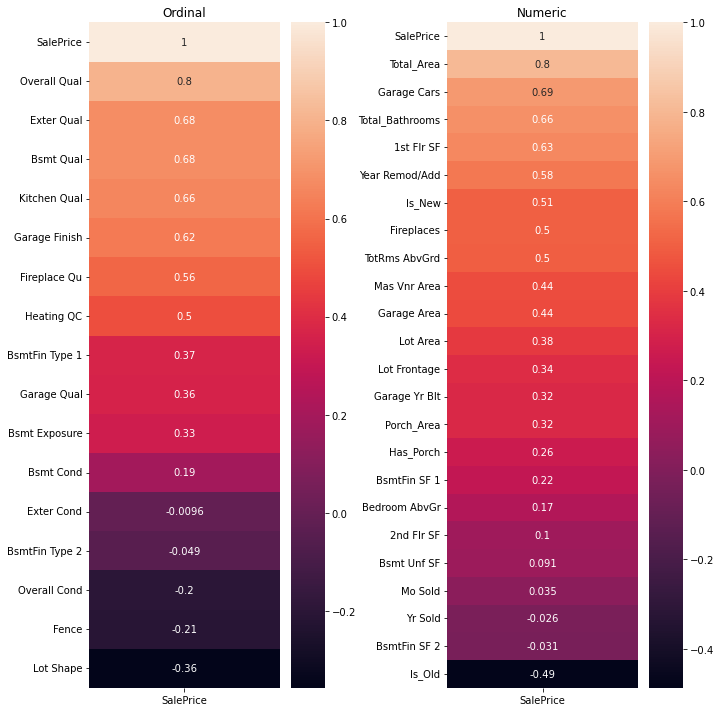

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.heatmap(ord_corr_2, annot=True, ax=ax1).set_title("Ordinal")
sns.heatmap(numeric_corr_2, annot=True, ax=ax2).set_title("Numeric")
plt.tight_layout()
plt.show()

_Correlation: For the ordinal features, "Overall Qual", "Bsmt Qual", "Exter Qual" and "Kitchen Qual" are highly positiv correlated to SalePrice, whereas "Lot Shape" is negativ correlated. For the numeric features, "Total_Area", "Garage Cars", "Total_Bathrooms" and "Garage Area" are also highly positiv correlated to SalePrice, whereas "Is_Old" is negativ correlated._

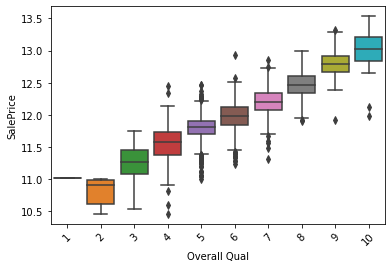

In [122]:
chart = sns.boxplot(x=df["Overall Qual"], y=df.SalePrice)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

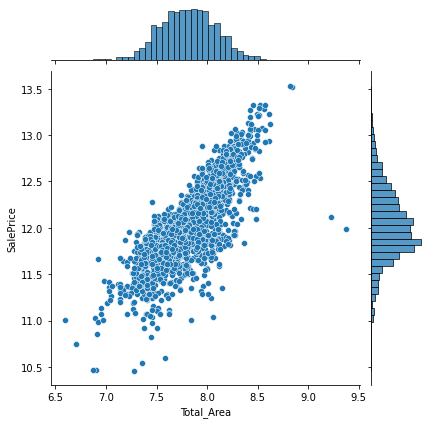

In [123]:
sns.jointplot(x="Total_Area", y="SalePrice", data=df)
plt.show()

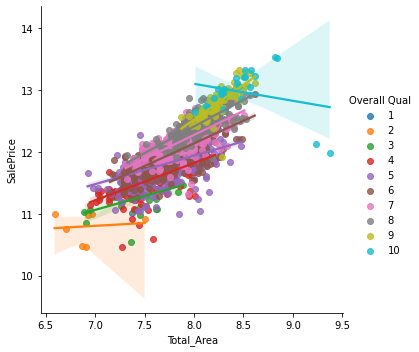

In [124]:
sns.lmplot(x="Total_Area", y="SalePrice", data=df, hue="Overall Qual")
plt.show()

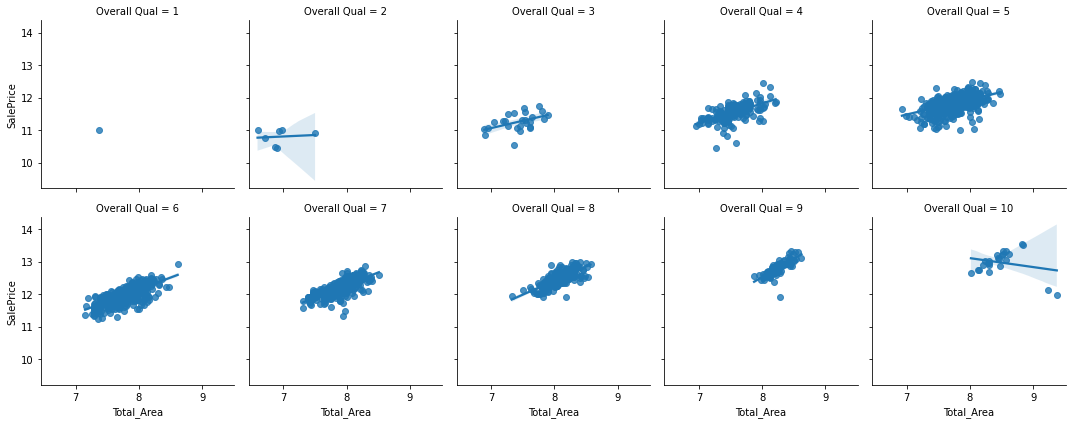

In [125]:
sns.lmplot(
    x="Total_Area", y="SalePrice", data=df, col="Overall Qual", col_wrap=5, height=3
)
plt.show()

## Model fitting
---

### Splitting data

_Consideration: I decided to split my data 60% - 40%, as I want to be sure to have a big enough trainig dataset. I consider 40% of the data to be enough for validation. Furthermore I chose the number 8 for the the random_state, as it is my lucky number._

In [126]:
from sklearn.model_selection import train_test_split

# Split into train / validation sets
train_df, val_df = train_test_split(df, train_size=0.6, test_size=0.4, random_state=8)

print("Train DataFrame:", train_df.shape)
print("Validation DataFrame:", val_df.shape)

Train DataFrame: (1407, 172)
Validation DataFrame: (939, 172)


### 1. Simple Model

_Consideration: I decide to choose variables "Total_Area" and "Overall Qual" for my simple model because they are the most correlated with the target "SalePrice"._

In [127]:
# Create X/y variables
X_tr = train_df[["Total_Area", "Overall Qual"]].values
y_tr = train_df.SalePrice.values

X_val = val_df[["Total_Area", "Overall Qual"]].values
y_val = val_df.SalePrice.values

print("Shape X_tr:", X_tr.shape)
print("Shape y_tr:", y_tr.shape)

Shape X_tr: (1407, 2)
Shape y_tr: (1407,)


In [128]:
# Implement MAE cost function
def MAE(y, y_pred):
    return np.median(np.abs(y - y_pred))

In [129]:
# Fit and evaluate a multivariable linear regression
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()

# Fit the model
lr.fit(X_tr, y_tr)  # Fit to train data

# Compute predictions
y_pred_tr = lr.predict(X_tr)  # Train data
y_pred_val = lr.predict(X_val)  # validation data

# Evaluate model
mae_lr_val = MAE(np.expm1(y_val), np.expm1(y_pred_val))  # MAE on validation set
print("MAE linear regression - validation set: {:.3f}".format(mae_lr_val))
mae_lr_tr = MAE(np.expm1(y_tr), np.expm1(y_pred_tr))  # MAE on train set
print("MAE linear regression - train set: {:.3f}".format(mae_lr_tr))

MAE linear regression - validation set: 16828.200
MAE linear regression - train set: 16958.411


### 2. Intermediate Model

_Consideration: I decided to use the SelectKBest methode to get the top 15 highest scoring features. I will use the f_regression method for feature selection. This will select the features with the lagerst positive correlation score._

In [130]:
# SelectKBest removes all but the  highest scoring features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [131]:
# f_regression analyzes how the variance of a variable across the values of another variable compares to itself.
X_new = SelectKBest(f_regression, k=15).fit(
    df.drop(["SalePrice"], axis=1), df["SalePrice"]
)

for i in X_new.get_support(indices=True):
    print(df.columns[i])

Overall Qual
Year Remod/Add
Exter Qual
Bsmt Qual
1st Flr SF
Kitchen Qual
TotRms AbvGrd
Fireplaces
Fireplace Qu
Garage Finish
Garage Cars
Foundation_CBlock
Exterior 2nd_other
Total_Area
Has_Porch


In [132]:
selected_k_best = [
    "Year Remod/Add",
    "1st Flr SF",
    "Garage Yr Blt",
    "Garage Cars",
    "Garage Area",
    "Lot Shape",
    "Overall Cond",
    "Exter Cond",
    "Heating QC",
    "Kitchen Qual",
    "Fireplace Qu",
    "Foundation_CBlock",
    "Exterior 2nd_other",
    "Total_Area",
    "Has_Porch",
]

In [133]:
# Create X/y variables
X_tr_2 = train_df[selected_k_best].values
y_tr_2 = train_df.SalePrice.values

X_val_2 = val_df[selected_k_best].values
y_val_2 = val_df.SalePrice.values

print("Shape X_tr:", X_tr_2.shape)
print("Shape y_tr:", y_tr_2.shape)

Shape X_tr: (1407, 15)
Shape y_tr: (1407,)


In [134]:
# Fit and evaluate a linear regression model
# Linear regression
lr = LinearRegression()

# Fit the model
lr.fit(X_tr_2, y_tr_2)  # Fit to train data

# Compute predictions
y_pred_tr_2 = lr.predict(X_tr_2)  # Train data
y_pred_val_2 = lr.predict(X_val_2)  # validation data

# Evaluate model
mae_lr_val_2 = MAE(np.expm1(y_val_2), np.expm1(y_pred_val_2))  # MAE on validation set
print("MAE linear regression - validation set: {:.3f}".format(mae_lr_val_2))
mae_lr_tr_2 = MAE(np.expm1(y_tr_2), np.expm1(y_pred_tr_2))  # MAE on train set
print("MAE linear regression - train set: {:.3f}".format(mae_lr_tr_2))

MAE linear regression - validation set: 15978.273
MAE linear regression - train set: 15315.302


### 3. Complex Model

In [135]:
# Create X/y variables
X_tr_3 = train_df.drop("SalePrice", axis=1).values
y_tr_3 = train_df.SalePrice.values

X_val_3 = val_df.drop("SalePrice", axis=1).values
y_val_3 = val_df.SalePrice.values

print("Shape X_tr:", X_tr_3.shape)
print("Shape y_tr:", y_tr_3.shape)

Shape X_tr: (1407, 171)
Shape y_tr: (1407,)


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 4, num=100):
    # Create/fit the pipeline
    pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge(alpha))])
    pipe.fit(X_tr_3, y_tr_3)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr_3, pipe.predict(X_tr_3)),
            "val_mse": MSE(y_val_3, pipe.predict(X_val_3)),
            "train_mae": MAE(np.expm1(y_tr_3), np.expm1(pipe.predict(X_tr_3))),
            "val_mae": MAE(np.expm1(y_val_3), np.expm1(pipe.predict(X_val_3))),
        }
    )

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

In [137]:
gs_results.sort_values(by="val_mae", ascending=True).head(5)

,alpha,train_mse,val_mse,train_mae,val_mae
83,509.413801,0.013600,0.014747,9680.456239,10298.636678
84,613.590727,0.013947,0.014991,9652.988972,10371.531485
86,890.215085,0.014848,0.015677,9961.305949,10413.455908
85,739.072203,0.014359,0.015297,9825.694443,10451.297113
71,54.622772,0.012022,0.013958,9593.166335,10492.088657


In [138]:
# Get entry with the best validation MAE
best_result = gs_results.loc[gs_results.val_mae.idxmin()]

# Print the details
print("Best alpha: {:.2f}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.val_mse))
print("Validation MAE: {:.2f}$".format(best_result.val_mae))

Best alpha: 509.41
Validation MSE: 0.0147
Validation MAE: 10298.64$


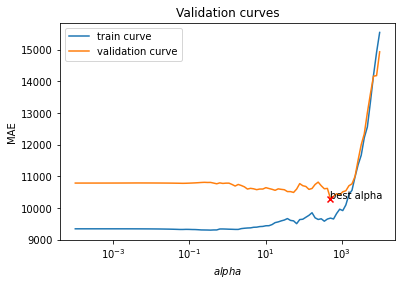

In [139]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mae"], label="train curve")
plt.semilogx(gs_results["alpha"], gs_results["val_mae"], label="validation curve")

# Add marker for best score
plt.scatter(
    best_result.alpha,
    best_result.val_mae,
    marker="x",
    c="red",
    zorder=10,
)

plt.annotate("best alpha", (509.41, 10298.64))

plt.title("Validation curves")
plt.xlabel("$alpha$")
plt.ylabel("MAE")
plt.legend()
plt.show()

_Observation: If the alpha values is to small, the model is overfitting and there is a gap between the train and validation curve. Tuning alpha helps to defeat overfitting. With an alpha lager then 10e3 the model is underfitting._

## Model evaluation
---

MAE median baseline: 36500.0$
MAE simple model: 16828.2$
MAE intermediate model: 15978.3$
MAE compley model: 10298.6$


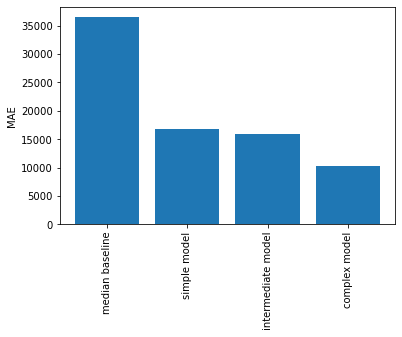

In [140]:
# Compare model to a baseline using a bar chart

# Create baseline
mae_baseline = MAE(np.expm1(y_val), np.expm1(np.median(y_tr)))

# Final comparison
mae_values = [mae_baseline, mae_lr_val, mae_lr_val_2, best_result.val_mae]
titles = ["median baseline", "simple model", "intermediate model", "complex model"]

# Print MAE
print("MAE median baseline: {:.1f}$".format(mae_baseline))
print("MAE simple model: {:.1f}$".format(mae_lr_val))
print("MAE intermediate model: {:.1f}$".format(mae_lr_val_2))
print("MAE compley model: {:.1f}$".format(best_result.val_mae))

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles, rotation=90)

plt.ylabel("MAE")
plt.show()

_Observation:_
* _The predictions from the baseline is wrong by in average 36'500 Dollars._
* _The prediction of my simple model is in average wrong by 16'828 Dollars._ 
* _The prediction of my intermediate model is in average wrong by 15'978 Dollars._
* _The prediction of my complex model is in average wrong by 10'298 Dollars._

## Compute Predictions
---

_Consideration: First I make sure that the two datasets have the same columns and the same column order._

In [141]:
# Compare df and test_df columns: shared columns
common_cols = df.columns.intersection(test_df.columns)

In [142]:
# Compare df and test_df columns: different columns
train_not_test = df.columns.difference(test_df.columns)
train_not_test

Index(['SalePrice'], dtype='object')

In [143]:
# Sorting columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)
test_df = test_df.reindex(sorted(test_df.columns), axis=1)

_Consideration: Next I will train the models on the whole dataset and compute predictions on unseen dataset._

### 1. Simple Model

In [144]:
# Create X/y variables of the whole training dataset
X_train = df[["Total_Area", "Overall Qual"]].values
y_train = df.SalePrice.values

# Create X variables of test data
X_test = test_df[["Total_Area", "Overall Qual"]].values

# Fit a linear regression
lr.fit(X_train, y_train)

# Compute predictions of test data
y_test_pred = lr.predict(X_test)

In [145]:
# Pair predicted price and PID
PID = test_df["PID"]
predictions_simple_model = pd.DataFrame(
    np.expm1(y_test_pred), columns=["SalePrice"]
).join(PID)

In [146]:
# Export as CSV
predictions_simple_model.to_csv(
    "/Users/tabea-retina/Dropbox/Tabea/Machine Learning/JupyterLab/resources/c3_course_project/submission_house_prices/predictions-simple-model.csv",
    index=False,
)

### 2. Intermediate Model

In [147]:
# Create X/y variables of the whole training dataset
X_train_2 = df[selected_k_best].values
y_train_2 = df.SalePrice.values

# Create X variables of test data
X_test_2 = test_df[selected_k_best].values

# Fit a linear regression
lr.fit(X_train_2, y_train_2)

# Compute predictions of test data
y_test_pred_2 = lr.predict(X_test_2)

In [148]:
# Pair predicted price and PID
predictions_intermediate_model = pd.DataFrame(
    np.expm1(y_test_pred_2), columns=["SalePrice"]
).join(PID)

In [149]:
# Export as CSV
predictions_intermediate_model.to_csv(
    "/Users/tabea-retina/Dropbox/Tabea/Machine Learning/JupyterLab/resources/c3_course_project/submission_house_prices/predictions-intermediate-model.csv",
    index=False,
)

### 3. Complex Model

In [150]:
# Create X/y variables of the whole training dataset
X_train_3 = df.drop("SalePrice", axis=1).values
y_train_3 = df.SalePrice.values

# Create X variables of test data
X_test_3 = test_df.values

# Standardize the data
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train_3)
X_test_rescaled = scaler.transform(X_test_3)

# fit the ridge regression model with the best alpha
ridge = Ridge(alpha=509.41)
ridge.fit(X_train_rescaled, y_train_3)

# Compute predictions of test data
y_test_pred_3 = ridge.predict(X_test_rescaled)

In [151]:
# Pair predicted price and PID
predictions_complex_model = pd.DataFrame(
    np.expm1(y_test_pred_3), columns=["SalePrice"]
).join(PID)

In [152]:
# Export as CSV
predictions_complex_model.to_csv(
    "/Users/tabea-retina/Dropbox/Tabea/Machine Learning/JupyterLab/resources/c3_course_project/submission_house_prices/predictions-complex-model.csv",
    index=False,
)

### Compare predictions

Train Dataset Mean: 182230$
Test Dataset Mean - Simple Model: 179812$
Test Dataset - Intermediate Model: 179309$
Test Dataset Mean - Complex Model: 181314$


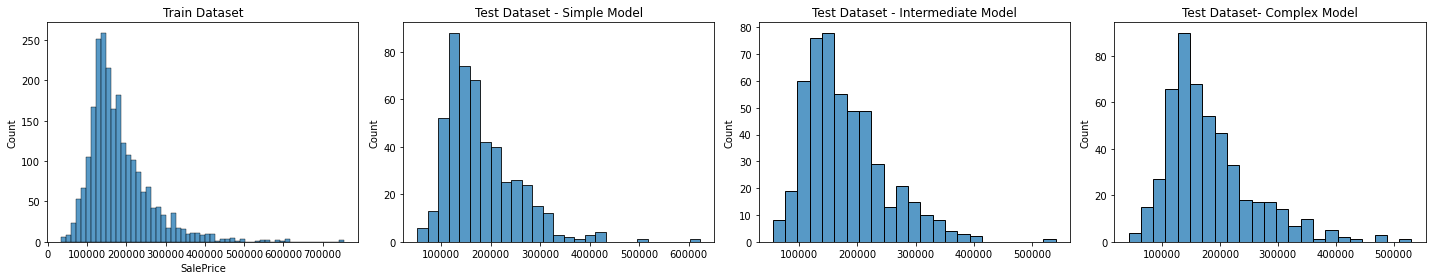

In [153]:
# create histograms for Sale Price
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(x=np.expm1(df["SalePrice"]), ax=ax1).set_title("Train Dataset")
sns.histplot(x=np.expm1(y_test_pred), ax=ax2).set_title("Test Dataset - Simple Model")
sns.histplot(x=np.expm1(y_test_pred_2), ax=ax3).set_title(
    "Test Dataset - Intermediate Model"
)
sns.histplot(x=np.expm1(y_test_pred_3), ax=ax4).set_title("Test Dataset- Complex Model")


print("Train Dataset Mean: {:.0f}$".format(np.expm1(df["SalePrice"]).mean()))
print("Test Dataset Mean - Simple Model: {:.0f}$".format(np.expm1(y_test_pred).mean()))
print(
    "Test Dataset - Intermediate Model: {:.0f}$".format(np.expm1(y_test_pred_2).mean())
)
print(
    "Test Dataset Mean - Complex Model: {:.0f}$".format(np.expm1(y_test_pred_3).mean())
)


plt.tight_layout()
plt.show()

_Observation: The distribution of the predicted house prices look reasonable - for all three models. The mean values are in a similar range._

_According to the evaluation results from https://p3review.herokuapp.com/ I got the following MAE & RMSE:_

Simple model:
* MAE: $23,586.88, RMSE: 37256.07 

Intermediate model:
* MAE: $22,099.32, RMSE: 35002.38   

Complex model: 
* MAE: $15,889.64, RMSE: 28061.11

_The complex model has the lowest price difference, in average the predictions of this model is wrong by 15'889 Dollars._